In [1]:
from src import PickleManager
from src import Resolution
from src import Camera
from src import Vertex, Vector
from src import Scene

pm = PickleManager(directory="./pickle_data", verbose=True)

# Camera and scene setup

we can choose resolution of the camera from the predefined resolutions in the Resolution enum or make a custom one

In [2]:
resolution = Resolution.R144p
#resolution = Resolution.custom(1280, 640)

camera = Camera(
    fov = 60,
    resolution = resolution,
    origin = Vertex(0, 0, 0),
    direction = Vector(0, 0, -1),
    up_hint = Vector(0, 1, 0)
)

print(f"Camera: {camera}")

Camera: Camera(fov=60, resolution=<Resolution.R144p: (256, 144)>, origin=Vec3(0.000, 0.000, 0.000), direction=Vec3(0.000, 0.000, -1.000), up_hint=Vec3(0.000, 1.000, 0.000))


## setup scene with world and lights

In [3]:
world = pm.load("world.pkl")
light_lib = pm.load_light_library()

lights = light_lib.get_all_lights()

sphere_scene = Scene(
    camera = camera,
    world = world,
    lights = lights,
    skybox_path = "./skybox/shanghai_4k.hdr"
)

#todo how to handle light lists? should scene have a light library and add light types?
pm.save_scene(sphere_scene, scene_name="spheres")

Loaded object from pickle_data/world.pkl
Loaded object from pickle_data/lights.pkl
{'ambient': AmbientLight(intensity=0.0,
                         position=Vec3(0.000, 0.000, 0.000),
                         falloff=1.0,
                         type=<LightType.AMBIENT: 'ambient'>),
 'point': PointLight(intensity=2000.0,
                     position=Vec3(5.000, 5.000, 2.000),
                     falloff=0.1,
                     type=<LightType.POINT: 'point'>),
 'point2': PointLight(intensity=2000.0,
                      position=Vec3(-5.000, 5.000, 2.000),
                      falloff=0.1,
                      type=<LightType.POINT: 'point'>),
 'point3': PointLight(intensity=2000.0,
                      position=Vec3(0.000, 5.000, -5.000),
                      falloff=0.1,
                      type=<LightType.POINT: 'point'>)}
Saved object to pickle_data/scene_spheres.pkl
Scene(world=<src.geometry.world.World object at 0x108c276b0>, camera=Camera(fov=60, resolution=<Resoluti

### Render a preview with no antialiasing, no recursion and no skybox at 144p resolution for speed just to see all objects in the scene

Scene validation passed.
Rendering preview at resolution Resolution.R144p with FOV 60


Preview render took 7.44 seconds


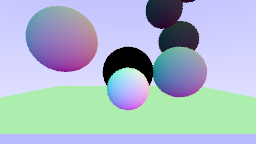

Saved object to pickle_data/scene_spheres.pkl
Scene(world=<src.geometry.world.World object at 0x108c276b0>, camera=Camera(fov=60, resolution=<Resolution.R144p: (256, 144)>, origin=Vec3(0.000, 0.000, 0.000), direction=Vec3(0.000, 0.000, -1.000), up_hint=Vec3(0.000, 1.000, 0.000)), lights=[AmbientLight(intensity=0.0, position=Vec3(0.000, 0.000, 0.000), falloff=1.0, type=<LightType.AMBIENT: 'ambient'>), PointLight(intensity=2000.0, position=Vec3(5.000, 5.000, 2.000), falloff=0.1, type=<LightType.POINT: 'point'>), PointLight(intensity=2000.0, position=Vec3(-5.000, 5.000, 2.000), falloff=0.1, type=<LightType.POINT: 'point'>), PointLight(intensity=2000.0, position=Vec3(0.000, 5.000, -5.000), falloff=0.1, type=<LightType.POINT: 'point'>)])


In [4]:
sphere_scene.validate()
sphere_scene.render_preview()

pm.save_scene(sphere_scene, scene_name="spheres")

### Move camera, change FOV and render another preview

Rendering preview at resolution Resolution.R144p with FOV 60


Preview render took 6.73 seconds


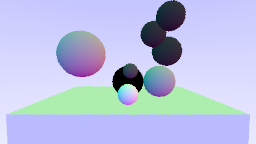

'./images/preview.png'

In [5]:
sphere_scene.move_camera_to(Vertex(0, 1, 3))
sphere_scene.look_at(Vertex(0, 0.7, -3))
sphere_scene.set_camera_fov(60)

sphere_scene.render_preview()

### Move light and render another preview to see effect of light position change

Rendering preview at resolution Resolution.R144p with FOV 60


Preview render took 6.76 seconds


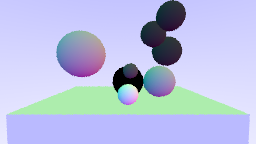

'./images/preview.png'

In [6]:
sphere_scene.translate_light(lights[0], Vector(1, 1, -3))

sphere_scene.render_preview()

# Save the scene for later use

when we are done setting up the scene we can save it for later use

In [7]:
pm.save_scene(sphere_scene, scene_name="spheres")

Saved object to pickle_data/scene_spheres.pkl
Scene(world=<src.geometry.world.World object at 0x108c276b0>, camera=Camera(fov=60, resolution=<Resolution.R144p: (256, 144)>, origin=Vec3(0.000, 1.000, 3.000), direction=Vec3(0.000, -0.050, -0.999), up_hint=Vec3(0.000, 1.000, 0.000)), lights=[AmbientLight(intensity=0.0, position=Vec3(1.000, 1.000, -3.000), falloff=1.0, type=<LightType.AMBIENT: 'ambient'>), PointLight(intensity=2000.0, position=Vec3(5.000, 5.000, 2.000), falloff=0.1, type=<LightType.POINT: 'point'>), PointLight(intensity=2000.0, position=Vec3(-5.000, 5.000, 2.000), falloff=0.1, type=<LightType.POINT: 'point'>), PointLight(intensity=2000.0, position=Vec3(0.000, 5.000, -5.000), falloff=0.1, type=<LightType.POINT: 'point'>)])
